In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv('C:/Users/eldiy/Documents/Applications/old/Ironhack/test/exercises/data/housing_prices.csv')

In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
missing_df=df.isna().sum()
missing_df[missing_df>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [15]:
df.drop('LotFrontage',axis=1,inplace=True)

In [17]:
df.drop('Alley',axis=1,inplace=True)

In [22]:
df[['FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PoolQC']]=df[['FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PoolQC']].fillna(0)

In [23]:
missing_df=df.isna().sum()
missing_df[missing_df>0]

MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
Fence           1179
MiscFeature     1406
dtype: int64

In [28]:
df.Electrical=df.Electrical.fillna(df.Electrical.mode()[0])

In [29]:
missing_df=df.isna().sum()
missing_df[missing_df>0]

MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Fence           1179
MiscFeature     1406
dtype: int64

In [40]:
df.MasVnrType=df.MasVnrType.fillna('None')

In [41]:
df.loc[df.MasVnrType=='None','MasVnrArea']=0

In [46]:
df.loc[(df.MasVnrType!='None')&(df['MasVnrArea']==0),'MasVnrType']='None'

In [47]:
missing_df=df.isna().sum()
missing_df[missing_df>0]

BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Fence           1179
MiscFeature     1406
dtype: int64

In [55]:
df.drop(df.loc[df.BsmtQual.isna(),'BsmtQual'].index,inplace=True)

In [56]:
missing_df=df.isna().sum()
missing_df[missing_df>0]

BsmtExposure       1
BsmtFinType2       1
Fence           1146
MiscFeature     1372
dtype: int64

In [60]:
df.loc[df.BsmtFinType2.isna(),'BsmtFinType2']=df.loc[df.BsmtFinType2.isna(),'BsmtFinType1']

In [62]:
df.BsmtExposure=df.BsmtExposure.fillna(df.BsmtExposure.mode()[0])

In [63]:
missing_df=df.isna().sum()
missing_df[missing_df>0]

Fence          1146
MiscFeature    1372
dtype: int64

In [67]:
df.shape[1]

79

In [71]:
df_nm=pd.get_dummies(data=df,columns=['Fence','MiscFeature'])

In [73]:
df_nm.set_index('Id',inplace=True)

In [74]:
df_nm.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,SaleCondition,SalePrice,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Normal,208500,0,0,0,0,0,0,0,0
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Normal,181500,0,0,0,0,0,0,0,0
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Normal,223500,0,0,0,0,0,0,0,0
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Abnorml,140000,0,0,0,0,0,0,0,0
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Normal,250000,0,0,0,0,0,0,0,0


In [77]:
low_variance=[]
for col in df_nm._get_numeric_data():
    minimum=min(df_nm[col])
    ninety_perc=np.percentile(df_nm[col],90)
    if ninety_perc==minimum:
        low_variance.append(col)
print(low_variance)

['LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnWw', 'MiscFeature_Gar2', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC']


In [94]:
df_nm.loc[df_nm.PoolArea>0,'PoolArea']=1

In [95]:
df_nm.PoolArea.value_counts()

0    1416
1       7
Name: PoolArea, dtype: int64

In [111]:
print([i for i in df_nm.columns if i not in df_nm._get_numeric_data().columns.tolist()])

['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'SaleType', 'SaleCondition']


In [182]:
df.SaleCondition.value_counts()

Normal     1166
Partial     125
Abnorml     100
Family       20
Alloca        9
AdjLand       3
Name: SaleCondition, dtype: int64

In [174]:
df_nm.GarageFinish=df_nm.GarageFinish.map({'Fin':1}).fillna(0)

In [169]:
df_nm.loc[df_nm.GarageType!=0,'GarageType']=1
df_nm.GarageType.dtype

dtype('int64')

In [159]:
df_nm.CentralAir=df_nm.CentralAir.map({'Y':1,'N':0})

In [156]:
exposure_dict={'Gd':3,'Av':2,'Mn':1,'No':0}

df_nm.BsmtExposure=df_nm.BsmtExposure.map(exposure_dict)

In [152]:
qual_dict={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}

df_nm.ExterQual=df_nm.ExterQual.map(qual_dict)
df_nm.BsmtQual=df_nm.BsmtQual.map(qual_dict)

In [180]:
df_nm.PoolQC=df_nm.PoolQC.map(qual_dict).fillna(0)

In [162]:
df_nm.KitchenQual=df_nm.KitchenQual.map(qual_dict)

In [176]:
df_nm.GarageQual=df_nm.GarageQual.map(qual_dict).fillna(0)

In [165]:
df_nm.FireplaceQu=df_nm.FireplaceQu.map(qual_dict)
df_nm.FireplaceQu.fillna(0,inplace=True)

In [143]:
df_nm.MasVnrArea=df_nm.MasVnrArea.astype(float)

In [121]:
df_nm.LandSlope=df_nm.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})

In [118]:
df_nm.drop(df_nm[df_nm.Utilities=='NoSeWa'].index,inplace=True)

In [110]:
df_nm.LotShape=df_nm.LotShape.map({'Reg':0,'IR1':1,'IR2':2,'IR3':3})

In [184]:
df_nm.drop(['Street','LandContour','Utilities','Condition1', 'Condition2','HouseStyle','RoofStyle','RoofMatl',
            'Exterior1st', 'Exterior2nd','ExterCond','BsmtCond','BsmtFinType1', 'BsmtFinType2','Heating','HeatingQC',
            'Electrical','Functional','GarageCond','PavedDrive'],axis=1,inplace=True)

In [188]:
df_dummies=pd.get_dummies(data=df_nm, columns=['MSZoning','LotConfig','Neighborhood','BldgType','MasVnrType','Foundation','SaleCondition','SaleType'], drop_first=True)

In [190]:
df_dummies.shape

(1422, 112)

In [192]:
df_dummies._get_numeric_data().shape

(1422, 112)

In [193]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 1 to 1460
Columns: 112 entries, MSSubClass to SaleType_WD
dtypes: float64(6), int64(42), uint8(64)
memory usage: 633.2 KB


In [198]:
df_dummies.YearBuilt=2019-df_dummies.YearBuilt
df_dummies.YearRemodAdd=2019-df_dummies.YearRemodAdd

In [202]:
df_dummies.corr().SalePrice[abs(df_dummies.corr().SalePrice)>0.4].sort_values()

YearBuilt              -0.518535
YearRemodAdd           -0.499997
Neighborhood_NridgHt    0.401984
GarageFinish            0.416221
Fireplaces              0.461427
MasVnrArea              0.473050
Foundation_PConc        0.491768
FireplaceQu             0.516541
TotRmsAbvGrd            0.542919
FullBath                0.573379
TotalBsmtSF             0.609580
1stFlrSF                0.614085
GarageArea              0.622792
GarageCars              0.643184
BsmtQual                0.643915
KitchenQual             0.655601
ExterQual               0.677163
GrLivArea               0.709287
OverallQual             0.787943
SalePrice               1.000000
Name: SalePrice, dtype: float64

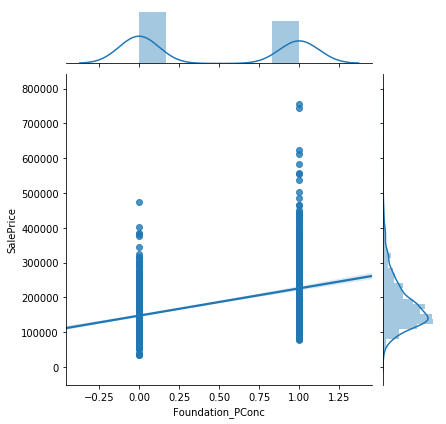

In [209]:
sns.jointplot(y='SalePrice',x='Foundation_PConc',data=df_dummies, kind='reg')

In [210]:
y=df_dummies.SalePrice
X=df_dummies.drop('SalePrice',axis=1)

In [215]:
from statsmodels.tools.tools import add_constant
X=add_constant(X)

C:\Users\eldiy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [378]:
#X=X.drop('LandSlope',axis=1)
#X=X.drop('BsmtFinSF2',axis=1)
#X=X.drop('EnclosedPorch',axis=1)
#X=X.drop('OpenPorchSF',axis=1)
#X=X.drop('Fence_GdPrv',axis=1)
#X=X.drop('Fence_GdWo',axis=1)
#X=X.drop('Fence_MnWw',axis=1)
#X=X.drop('Fence_MnPrv',axis=1)
#X=X.drop('YearRemodAdd',axis=1)
#X=X.drop('BsmtFinSF1',axis=1)
#X=X.drop('CentralAir',axis=1)
#X=X.drop('MiscFeature_Othr',axis=1)
#X=X.drop('LotConfig_Inside',axis=1)
#X=X.drop('Neighborhood_Blueste',axis=1)
#X=X.drop('BldgType_TwnhsE',axis=1)
#X=X.drop('SaleCondition_Family',axis=1)
#X=X.drop('SaleType_WD',axis=1)
#X=X.drop('SaleType_ConLw',axis=1)
#X=X.drop('Neighborhood_Timber',axis=1)
#X=X.drop('Neighborhood_ClearCr',axis=1)
#X=X.drop('TotalBsmtSF',axis=1)
#X=X.drop('LowQualFinSF',axis=1)
#X=X.drop('SaleCondition_Alloca',axis=1)
#X=X.drop('2ndFlrSF',axis=1)
#X=X.drop('FireplaceQu',axis=1)
#X=X.drop('GarageArea',axis=1)
#X=X.drop('SaleType_Oth',axis=1)
#X=X.drop('SaleCondition_AdjLand',axis=1)
#X=X.drop('Neighborhood_SawyerW',axis=1)
#X=X.drop('LotShape',axis=1)
#X=X.drop('1stFlrSF',axis=1)
#X=X.drop('MiscFeature_Shed',axis=1)
#X=X.drop('BsmtUnfSF',axis=1)
#X=X.drop('HalfBath',axis=1)
#X=X.drop('GarageType',axis=1)
#X=X.drop('MiscVal',axis=1)
#X=X.drop('MoSold',axis=1)
#X=X.drop('YrSold',axis=1)
#X=X.drop('MiscFeature_Gar2',axis=1)
#X=X.drop('LotConfig_FR3',axis=1)
#X=X.drop('LotConfig_FR2',axis=1)
#X=X.drop('3SsnPorch',axis=1)
#X=X.drop('Neighborhood_BrkSide',axis=1)
#X=X.drop('Neighborhood_CollgCr',axis=1)
#X=X.drop('Neighborhood_IDOTRR',axis=1)
#X=X.drop('Neighborhood_Mitchel',axis=1)
#X=X.drop('Neighborhood_NAmes',axis=1)
#X=X.drop('Neighborhood_NWAmes',axis=1)
#X=X.drop('Neighborhood_Sawyer',axis=1)
#X=X.drop('Neighborhood_SWISU',axis=1)
#X=X.drop('SaleType_ConLI',axis=1)
#X=X.drop('SaleType_ConLD',axis=1)
#X=X.drop('SaleCondition_Partial',axis=1)
#X=X.drop('SaleType_CWD',axis=1)
#X=X.drop('Foundation_Stone',axis=1)
#X=X.drop('Foundation_Wood',axis=1)
#X=X.drop('BldgType_Duplex',axis=1)
#X=X.drop('BldgType_Twnhs',axis=1)
#X=X.drop('Foundation_PConc',axis=1)
#X=X.drop('Foundation_CBlock',axis=1)
#X=X.drop('SaleType_Con',axis=1)
#X=X.drop('Neighborhood_OldTown',axis=1)
#X=X.drop('Neighborhood_Gilbert',axis=1)
#X=X.drop('FullBath',axis=1)
#X=X.drop('MasVnrType_BrkFace',axis=1)
##X=X.drop('MasVnrType_Stone',axis=1)
#X=X.drop('Neighborhood_MeadowV',axis=1)
#X=X.drop('MiscFeature_TenC',axis=1)
#X=X.drop('BsmtHalfBath',axis=1)
#X=X.drop('MSZoning_RM',axis=1)
#X=X.drop('MSZoning_FV',axis=1)
#X=X.drop('MSZoning_RL',axis=1)
X=X.drop('MSZoning_RH',axis=1)



In [379]:
model=sm.OLS(y,X)
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     230.3
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:48:28   Log-Likelihood:                -16645.
No. Observations:                1422   AIC:                         3.337e+04
Df Residuals:                    1383   BIC:                         3.357e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -7.317e+04   1.34e+04     -5.450      0.000   -9.95e+04   -4.68e+04
MSSubClass            -295.8174     24.572    -12.039      0.000    -344.020    -247.615
LotArea                  0.3063      0.089      3.439      0.001       0.132       0.481
OverallQual           9657.2982   1129.856      8.547      0.000    7440.881    1.19e+04
OverallCond           5050.6043    843.083      5.991      0.000    3396.745    6704.464
YearBuilt             -220.1197     49.184     -4.475      0.000    -316.603    -123.636
MasVnrArea              27.1878      6.743      4.032      0.000      13.960      40.416
ExterQual             5440.0834   2403.566      2.263      0.024     725.055    1.02e+04
BsmtQual              8018.7457   2065.431      3.882      0.000    3967.029    1.21e+04
BsmtExposure          7362.4892    886.535      8.305      0.000    5623.391    9101.587
GrLivArea               44.7281      3.612     12.384      0.000      37.643      51.813
BsmtFullBath          1.045e+04   1687.398      6.194      0.000    7142.021    1.38e+04
BedroomAbvGr         -3640.0920   1487.823     -2.447      0.015   -6558.725    -721.459
KitchenAbvGr         -1.046e+04   4828.783     -2.166      0.030   -1.99e+04    -987.180
KitchenQual           8502.7213   1893.996      4.489      0.000    4787.307    1.22e+04
TotRmsAbvGrd          3709.5395   1100.185      3.372      0.001    1551.327    5867.752
Fireplaces            4057.9053   1539.403      2.636      0.008    1038.088    7077.723
GarageYrBlt            -20.1630      5.610     -3.594      0.000     -31.167      -9.159
GarageFinish          5774.2847   2134.983      2.705      0.007    1586.130    9962.440
GarageCars            1.005e+04   1829.957      5.491      0.000    6459.355    1.36e+04
GarageQual            9372.9027   3448.883      2.718      0.007    2607.296    1.61e+04
WoodDeckSF              15.9959      6.925      2.310      0.021       2.412      29.580
ScreenPorch             61.3099     14.726      4.164      0.000      32.423      90.197
PoolArea             -1.298e+05   3.85e+04     -3.367      0.001   -2.05e+05   -5.42e+04
PoolQC                 3.24e+04      1e+04      3.238      0.001    1.28e+04     5.2e+04
LotConfig_CulDSac     9506.4578   3363.839      2.826      0.005    2907.679    1.61e+04
Neighborhood_BrDale   1.677e+04   8282.265      2.025      0.043     524.512     3.3e+04
Neighborhood_Crawfor   2.79e+04   4554.963      6.125      0.000     1.9e+04    3.68e+04
Neighborhood_Edwards -9079.1810   3414.033     -2.659      0.008   -1.58e+04   -2381.938
Neighborhood_NPkVill  2.162e+04   1.04e+04      2.081      0.038    1238.922     4.2e+04
Neighborhood_NoRidge  5.168e+04   5445.428      9.490      0.000     4.1e+04    6.24e+04
Neighborhood_NridgHt  4.904e+04   4344.064     11.289    

In [380]:
X.shape

(1422, 39)

# Multicollinearity

In [381]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [387]:
#X.drop('PoolQC',axis=1,inplace=True)
pd.Series([VIF(X.values,i) for i in range(X.shape[1])],index=X.columns)

const                   289.876041
MSSubClass                1.731763
LotArea                   1.299051
OverallQual               3.793282
OverallCond               1.406799
YearBuilt                 3.587023
MasVnrArea                2.400870
ExterQual                 3.072271
BsmtQual                  3.175105
BsmtExposure              1.383315
GrLivArea                 5.508711
BsmtFullBath              1.237548
BedroomAbvGr              2.333189
KitchenAbvGr              1.479411
KitchenQual               2.530346
TotRmsAbvGrd              4.983720
Fireplaces                1.586811
GarageYrBlt               9.802056
GarageFinish              1.358522
GarageCars                2.969578
GarageQual                9.480710
WoodDeckSF                1.224339
ScreenPorch               1.079007
LotConfig_CulDSac         1.090187
Neighborhood_BrDale       1.227069
Neighborhood_Crawfor      1.151470
Neighborhood_Edwards      1.095138
Neighborhood_NPkVill      1.091937
Neighborhood_NoRidge

In [386]:
X.drop('PoolArea',axis=1,inplace=True)
model=sm.OLS(y,X)
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     241.2
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:09:45   Log-Likelihood:                -16650.
No. Observations:                1422   AIC:                         3.337e+04
Df Residuals:                    1385   BIC:                         3.357e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -7.361e+04   1.35e+04     -5.464      0.000      -1e+05   -4.72e+04
MSSubClass            -296.2466     24.654    -12.016      0.000    -344.610    -247.883
LotArea                  0.3058      0.089      3.423      0.001       0.131       0.481
OverallQual           9706.7334   1133.531      8.563      0.000    7483.110    1.19e+04
OverallCond           5028.9273    845.869      5.945      0.000    3369.605    6688.250
YearBuilt             -214.4627     49.321     -4.348      0.000    -311.215    -117.711
MasVnrArea              27.0251      6.760      3.998      0.000      13.764      40.286
ExterQual             5831.4809   2408.846      2.421      0.016    1106.101    1.06e+04
BsmtQual              8033.8507   2071.813      3.878      0.000    3969.621    1.21e+04
BsmtExposure          7478.0550    888.786      8.414      0.000    5734.543    9221.567
GrLivArea               45.7184      3.529     12.955      0.000      38.795      52.641
BsmtFullBath          1.031e+04   1689.667      6.100      0.000    6992.619    1.36e+04
BedroomAbvGr         -3669.1448   1492.789     -2.458      0.014   -6597.517    -740.773
KitchenAbvGr         -1.032e+04   4844.762     -2.131      0.033   -1.98e+04    -818.684
KitchenQual           8254.3383   1898.799      4.347      0.000    4529.506     1.2e+04
TotRmsAbvGrd          3435.5674   1093.308      3.142      0.002    1290.849    5580.286
Fireplaces            3912.6440   1543.971      2.534      0.011     883.870    6941.418
GarageYrBlt            -20.2969      5.627     -3.607      0.000     -31.336      -9.258
GarageFinish          6041.6140   2140.696      2.822      0.005    1842.256    1.02e+04
GarageCars            1.005e+04   1832.715      5.486      0.000    6459.104    1.36e+04
GarageQual            9521.0156   3457.390      2.754      0.006    2738.730    1.63e+04
WoodDeckSF              15.1898      6.943      2.188      0.029       1.569      28.811
ScreenPorch             54.6517     14.641      3.733      0.000      25.930      83.373
LotConfig_CulDSac     9506.2786   3375.157      2.817      0.005    2885.307    1.61e+04
Neighborhood_BrDale   1.714e+04   8308.736      2.062      0.039     837.050    3.34e+04
Neighborhood_Crawfor  2.787e+04   4565.367      6.104      0.000    1.89e+04    3.68e+04
Neighborhood_Edwards -9025.1245   3418.043     -2.640      0.008   -1.57e+04   -2320.025
Neighborhood_NPkVill  2.194e+04   1.04e+04      2.104      0.036    1488.286    4.24e+04
Neighborhood_NoRidge  5.223e+04   5460.399      9.566      0.000    4.15e+04    6.29e+04
Neighborhood_NridgHt  4.926e+04   4357.356     11.306      0.000    4.07e+04    5.78e+04
Neighborhood_Somerst  1.919e+04   3899.383      4.921      0.000    1.15e+04    2.68e+04
Neighborhood_StoneBr  5.707e+04   6505.149      8.773    

# Normality of Residuals

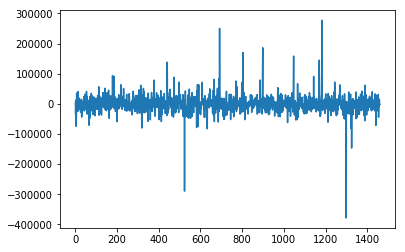

In [404]:
plt.plot(model_fit.resid)

In [392]:
model_fit.resid.mean()

2.465403488799196e-09

In [406]:
X[abs(model_fit.resid)>300000]

,const,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,...,Neighborhood_NPkVill,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,BldgType_2fmCon,MasVnrType_None,SaleCondition_Normal,SaleType_New
Id,,,,,,,,,,,,,,,,,,,,,
1299,1.0,60,63887,10,5,11,796.0,5,5,3,...,0,0,0,0,0,0,0,0,0,1


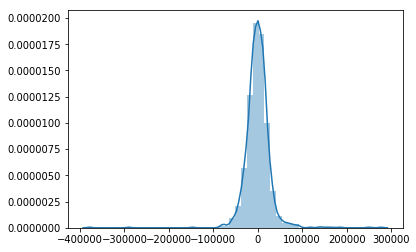

In [408]:
sns.distplot(model_fit.resid)

In [409]:
from scipy.stats import kstest

In [410]:
kstest(model_fit.resid,'norm')

KstestResult(statistic=0.5007032348804501, pvalue=0.0)

In [416]:
kstest(model_fit.resid[abs(model_fit.resid)<10000],'norm')

KstestResult(statistic=0.5081374321877152, pvalue=7.182869626283187e-133)

In [432]:
import statsmodels.stats.api as sms
sms.jarque_bera(model_fit.resid)[1]

0.0

## Residuals seem to be normal but since all the tests we checked failed, we cant call them normally distributed. That sucks :(

In [430]:
y_hat=model.predict(model_fit.params)
y_np=y.values

In [434]:
y_np-y_hat

array([  4804.9666766 , -33529.28978807,  12261.87681064, ...,
        15029.33574046,  -3500.22847224,  -1745.07579523])

In [435]:
model_fit.resid.values

array([  4804.9666766 , -33529.28978807,  12261.87681064, ...,
        15029.33574046,  -3500.22847224,  -1745.07579523])

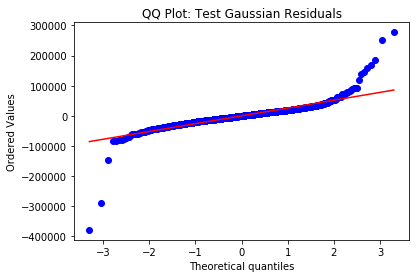

In [431]:
import pylab 
import scipy.stats as stats 
stats.probplot(y_np-y_hat, dist="norm", plot=pylab) 
pylab.title('QQ Plot: Test Gaussian Residuals') 
pylab.show()

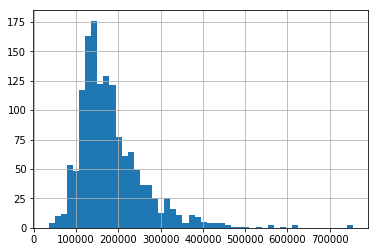

In [440]:
y.hist(bins=50)

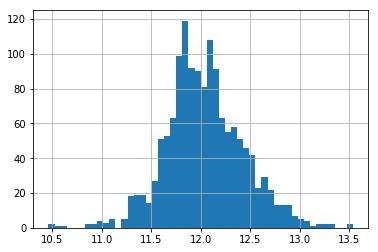

In [441]:
np.log(y).hist(bins=50)

In [457]:
#X.drop('MasVnrArea',axis=1,inplace=True)
#X.drop('ExterQual',axis=1,inplace=True)
#X.drop('GarageFinish',axis=1,inplace=True)
#X.drop('KitchenAbvGr',axis=1,inplace=True)
#X.drop('Neighborhood_NPkVill',axis=1,inplace=True)
#X.drop('MasVnrType_None',axis=1,inplace=True)
#X.drop('BedroomAbvGr',axis=1,inplace=True)
X.drop('Neighborhood_BrDale',axis=1,inplace=True)



In [458]:
y_new=np.log(y)
model=sm.OLS(y_new,X)
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     378.2
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:54:58   Log-Likelihood:                 837.64
No. Observations:                1422   AIC:                            -1617.
Df Residuals:                    1393   BIC:                            -1465.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.6499      0.050    210.958      0.000      10.551      10.749
MSSubClass              -0.0012      0.000    -11.626      0.000      -0.001      -0.001
LotArea               1.597e-06   4.05e-07      3.942      0.000    8.03e-07    2.39e-06
OverallQual              0.0635      0.005     12.907      0.000       0.054       0.073
OverallCond              0.0460      0.004     12.030      0.000       0.039       0.054
YearBuilt               -0.0031      0.000    -14.660      0.000      -0.004      -0.003
BsmtQual                 0.0237      0.009      2.588      0.010       0.006       0.042
BsmtExposure             0.0211      0.004      5.259      0.000       0.013       0.029
GrLivArea                0.0002   1.56e-05     13.698      0.000       0.000       0.000
BsmtFullBath             0.0611      0.008      8.017      0.000       0.046       0.076
KitchenQual              0.0343      0.008      4.276      0.000       0.019       0.050
TotRmsAbvGrd             0.0155      0.004      3.692      0.000       0.007       0.024
Fireplaces               0.0364      0.007      5.291      0.000       0.023       0.050
GarageYrBlt          -5.592e-05   2.55e-05     -2.190      0.029      -0.000   -5.82e-06
GarageCars               0.0536      0.008      6.552      0.000       0.038       0.070
GarageQual               0.0497      0.016      3.172      0.002       0.019       0.081
WoodDeckSF               0.0001   3.15e-05      3.184      0.001    3.85e-05       0.000
ScreenPorch              0.0003   6.64e-05      5.181      0.000       0.000       0.000
LotConfig_CulDSac        0.0436      0.015      2.846      0.004       0.014       0.074
Neighborhood_Crawfor     0.1743      0.021      8.411      0.000       0.134       0.215
Neighborhood_Edwards    -0.0549      0.015     -3.546      0.000      -0.085      -0.025
Neighborhood_NoRidge     0.1147      0.024      4.786      0.000       0.068       0.162
Neighborhood_NridgHt     0.1418      0.019      7.459      0.000       0.105       0.179
Neighborhood_Somerst     0.0970      0.017      5.587      0.000       0.063       0.131
Neighborhood_StoneBr     0.1840      0.029      6.291      0.000       0.127       0.241
Neighborhood_Veenker     0.0845      0.042      2.020      0.044       0.002       0.167
BldgType_2fmCon          0.1288      0.030      4.263      0.000       0.070       0.188
SaleCondition_Normal     0.0725      0.013      5.720      0.000       0.048       0.097
SaleType_New             0.0901      0.019      4.684      0.000       0.052       0.128
==============================================================================
Omnibus:                     1001.525   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42954.24

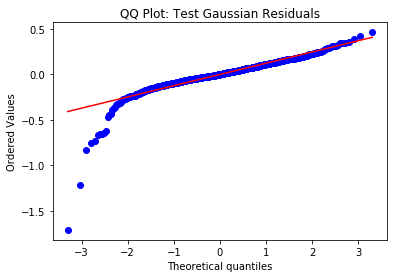

In [459]:
y_hat=model.predict(model_fit.params)
y_np=y_new.values

import pylab 
import scipy.stats as stats 
stats.probplot(y_np-y_hat, dist="norm", plot=pylab) 
pylab.title('QQ Plot: Test Gaussian Residuals') 
pylab.show()

In [465]:
kstest(model_fit.resid[model_fit.resid>-0.5],'norm')

KstestResult(statistic=0.3888756211324579, pvalue=8.916923856637633e-193)

# Linearity

In [470]:
from statsmodels.stats.diagnostic import linear_harvey_collier

In [471]:
linear_harvey_collier(model_fit)

LinAlgError: Singular matrix

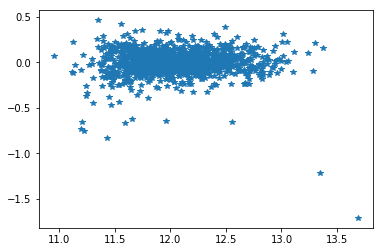

In [473]:
plt.plot(y_hat,y_np-y_hat,'*')

We plot this plot to see whether we can predict our y with residuals. If it is the case, we need to add variables. Here it is not the case

# Exogeneity step

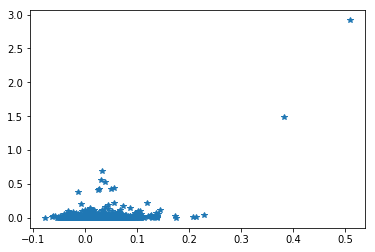

In [474]:
resid_model=sm.OLS((y_np-y_hat)**2,X)
results_resid=resid_model.fit()
resid_predict=resid_model.predict(results_resid.params)
plt.plot(resid_predict,(y_np-y_hat)**2,'*')

Here we try to predict residuals using X. If we see the trend, it sucks. 

In [484]:
iqr=pd.Series(y_new).describe()
cutoff=(iqr['75%']-iqr['25%'])*1.6
lbound=iqr['25%']-cutoff
ubound=iqr['75%']+cutoff
(lbound,ubound)


(11.002619044313766, 13.063485161138129)

In [496]:
y_new=np.log(y)

y_new=pd.Series(y_new)
print(y_new[(y_new<lbound)|(y_new>ubound)].shape)
#X=X.drop(y_new[(y_new<lbound)|(y_new>ubound)].index)
y_new=y_new.drop(y_new[(y_new<lbound)|(y_new>ubound)].index)


(23,)


In [494]:
(X.shape,y_new.shape)

((1399, 29), (1399,))

Here we dropped 23 outliers. But occasionaly they are not the only ones. We will see it later on.

In [497]:
model=sm.OLS(y_new,X)
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     371.7
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:19:21   Log-Likelihood:                 935.76
No. Observations:                1399   AIC:                            -1814.
Df Residuals:                    1370   BIC:                            -1661.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.7548      0.048    225.490      0.000      10.661      10.848
MSSubClass              -0.0012   9.47e-05    -13.030      0.000      -0.001      -0.001
LotArea               1.605e-06   3.76e-07      4.268      0.000    8.67e-07    2.34e-06
OverallQual              0.0575      0.005     12.452      0.000       0.048       0.067
OverallCond              0.0390      0.004     10.853      0.000       0.032       0.046
YearBuilt               -0.0029      0.000    -14.397      0.000      -0.003      -0.002
BsmtQual                 0.0284      0.009      3.333      0.001       0.012       0.045
BsmtExposure             0.0216      0.004      5.770      0.000       0.014       0.029
GrLivArea                0.0002   1.48e-05     14.160      0.000       0.000       0.000
BsmtFullBath             0.0571      0.007      8.060      0.000       0.043       0.071
KitchenQual              0.0371      0.007      4.958      0.000       0.022       0.052
TotRmsAbvGrd             0.0132      0.004      3.315      0.001       0.005       0.021
Fireplaces               0.0355      0.006      5.553      0.000       0.023       0.048
GarageYrBlt          -8.908e-05   2.44e-05     -3.656      0.000      -0.000   -4.13e-05
GarageCars               0.0564      0.008      7.431      0.000       0.042       0.071
GarageQual               0.0617      0.015      4.142      0.000       0.032       0.091
WoodDeckSF               0.0001   2.93e-05      3.536      0.000    4.61e-05       0.000
ScreenPorch              0.0003    6.3e-05      5.266      0.000       0.000       0.000
LotConfig_CulDSac        0.0429      0.014      2.997      0.003       0.015       0.071
Neighborhood_Crawfor     0.1776      0.019      9.267      0.000       0.140       0.215
Neighborhood_Edwards    -0.0617      0.014     -4.261      0.000      -0.090      -0.033
Neighborhood_NoRidge     0.1156      0.023      5.130      0.000       0.071       0.160
Neighborhood_NridgHt     0.1446      0.018      8.110      0.000       0.110       0.180
Neighborhood_Somerst     0.1040      0.016      6.473      0.000       0.072       0.135
Neighborhood_StoneBr     0.1797      0.029      6.296      0.000       0.124       0.236
Neighborhood_Veenker     0.0926      0.039      2.394      0.017       0.017       0.168
BldgType_2fmCon          0.1184      0.028      4.236      0.000       0.064       0.173
SaleCondition_Normal     0.0573      0.012      4.804      0.000       0.034       0.081
SaleType_New             0.0703      0.018      3.904      0.000       0.035       0.106
==============================================================================
Omnibus:                      965.820   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49276.50

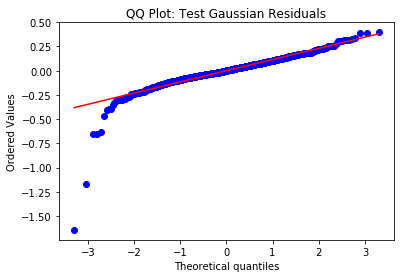

In [498]:
y_hat=model.predict(model_fit.params)
y_np=y_new.values

import pylab 
import scipy.stats as stats 
stats.probplot(y_np-y_hat, dist="norm", plot=pylab) 
pylab.title('QQ Plot: Test Gaussian Residuals') 
pylab.show()

Still some outiers on the left side

# Homoskedasticity

In [503]:
from statsmodels.stats.diagnostic import het_breuschpagan
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(y_np-y_hat,X)
print (f'the p-value for the lagrange multiplier test statistic is {lm_pvalue}')


the p-value for the lagrange multiplier test statistic is 3.5524449289670915e-42


In [525]:
?het_breuschpagan

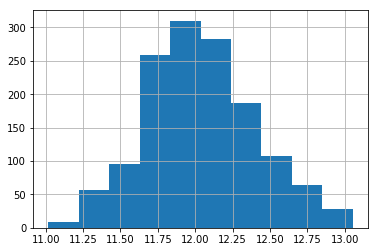

In [504]:
y_new.hist()

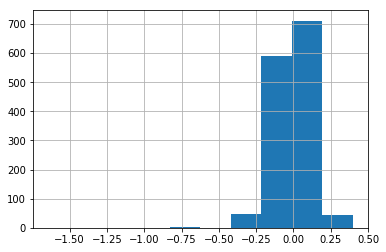

In [505]:
model_fit.resid.hist()

In [521]:
X.set_index('Id',inplace=True)
X.loc[model_fit.resid[model_fit.resid<-0.5].index]

,index,const,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,BsmtQual,BsmtExposure,GrLivArea,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,BldgType_2fmCon,SaleCondition_Normal,SaleType_New
Id,,,,,,,,,,,,,,,,,,,,,
463,446,1.0,20,8281,5,5,54,3,0,864,...,0,0,0,0,0,0,0,0,1,0
524,505,1.0,60,40094,10,5,12,5,3,4676,...,0,1,0,0,0,0,0,0,0,1
633,611,1.0,20,11900,7,5,42,3,0,1411,...,0,0,0,0,0,0,0,0,0,0
1299,1242,1.0,60,63887,10,5,11,5,3,5642,...,0,1,0,0,0,0,0,0,0,1
1325,1267,1.0,20,9986,8,5,13,5,2,1795,...,0,0,0,0,1,0,0,0,0,1


In [523]:
y.loc[model_fit.resid[model_fit.resid<-0.5].index]

Id
463      62383
524     184750
633      82500
1299    160000
1325    147000
Name: SalePrice, dtype: int64

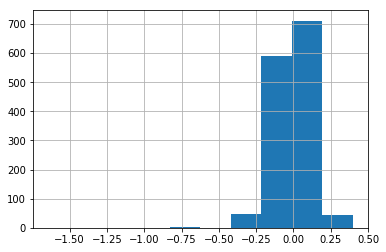

In [524]:
model_fit.resid.hist()

In [527]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     371.7
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:50:47   Log-Likelihood:                 935.76
No. Observations:                1399   AIC:                            -1814.
Df Residuals:                    1370   BIC:                            -1661.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.7548      0.048    225.490      0.000      10.661      10.848
MSSubClass              -0.0012   9.47e-05    -13.030      0.000      -0.001      -0.001
LotArea               1.605e-06   3.76e-07      4.268      0.000    8.67e-07    2.34e-06
OverallQual              0.0575      0.005     12.452      0.000       0.048       0.067
OverallCond              0.0390      0.004     10.853      0.000       0.032       0.046
YearBuilt               -0.0029      0.000    -14.397      0.000      -0.003      -0.002
BsmtQual                 0.0284      0.009      3.333      0.001       0.012       0.045
BsmtExposure             0.0216      0.004      5.770      0.000       0.014       0.029
GrLivArea                0.0002   1.48e-05     14.160      0.000       0.000       0.000
BsmtFullBath             0.0571      0.007      8.060      0.000       0.043       0.071
KitchenQual              0.0371      0.007      4.958      0.000       0.022       0.052
TotRmsAbvGrd             0.0132      0.004      3.315      0.001       0.005       0.021
Fireplaces               0.0355      0.006      5.553      0.000       0.023       0.048
GarageYrBlt          -8.908e-05   2.44e-05     -3.656      0.000      -0.000   -4.13e-05
GarageCars               0.0564      0.008      7.431      0.000       0.042       0.071
GarageQual               0.0617      0.015      4.142      0.000       0.032       0.091
WoodDeckSF               0.0001   2.93e-05      3.536      0.000    4.61e-05       0.000
ScreenPorch              0.0003    6.3e-05      5.266      0.000       0.000       0.000
LotConfig_CulDSac        0.0429      0.014      2.997      0.003       0.015       0.071
Neighborhood_Crawfor     0.1776      0.019      9.267      0.000       0.140       0.215
Neighborhood_Edwards    -0.0617      0.014     -4.261      0.000      -0.090      -0.033
Neighborhood_NoRidge     0.1156      0.023      5.130      0.000       0.071       0.160
Neighborhood_NridgHt     0.1446      0.018      8.110      0.000       0.110       0.180
Neighborhood_Somerst     0.1040      0.016      6.473      0.000       0.072       0.135
Neighborhood_StoneBr     0.1797      0.029      6.296      0.000       0.124       0.236
Neighborhood_Veenker     0.0926      0.039      2.394      0.017       0.017       0.168
BldgType_2fmCon          0.1184      0.028      4.236      0.000       0.064       0.173
SaleCondition_Normal     0.0573      0.012      4.804      0.000       0.034       0.081
SaleType_New             0.0703      0.018      3.904      0.000       0.035       0.106
==============================================================================
Omnibus:                      965.820   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49276.50